<a href="https://colab.research.google.com/github/UJWAL-SHAH/ML/blob/master/Lab%20Work/J078_Remedial_Assign_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Remedial Assignment No : 3

#Roll No: J078

# Breast-cancer-dropped-missing-attributes-values Classification Problem

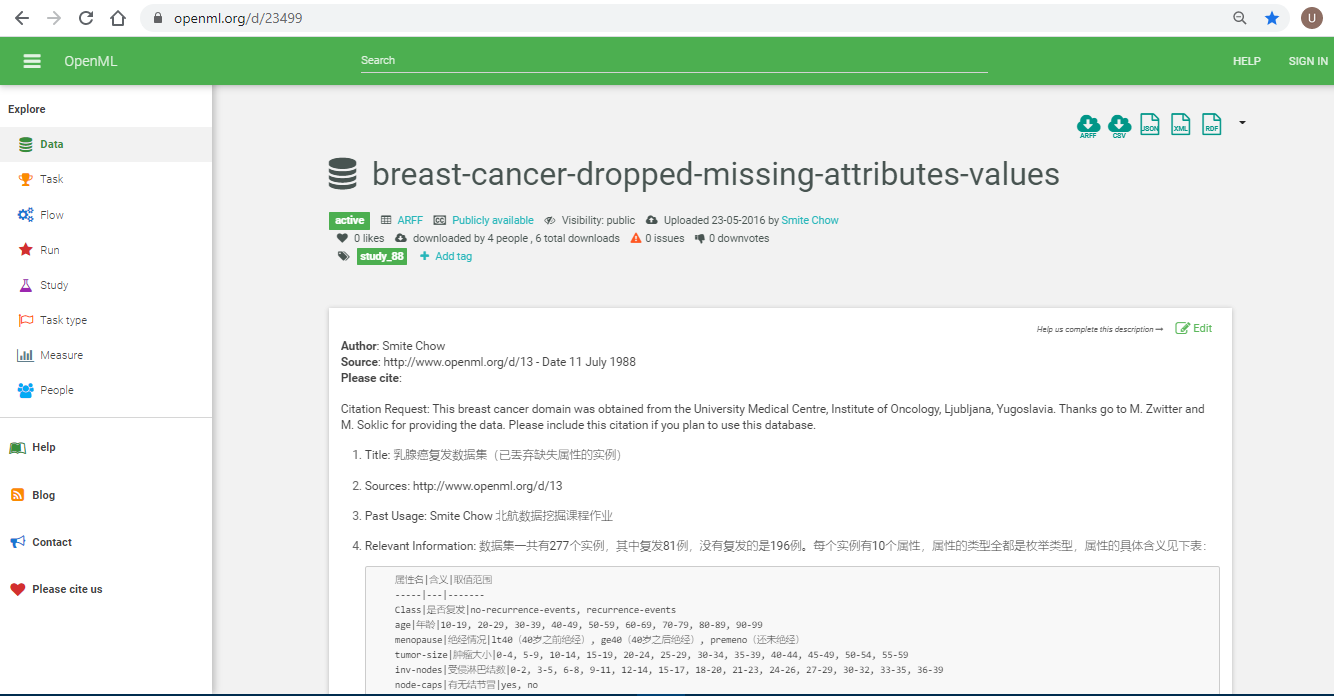

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data=pd.read_csv("/content/phpSNaed2.csv")
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [42]:
data.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

No missing value is there

In [43]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['age']= label_encoder.fit_transform(data["age"]) 
data['menopause']= label_encoder.fit_transform(data["menopause"]) 
data['tumor-size']= label_encoder.fit_transform(data["tumor-size"]) 
data['inv-nodes']= label_encoder.fit_transform(data["inv-nodes"]) 
data['node-caps']= label_encoder.fit_transform(data["node-caps"]) 
data['deg-malig']= label_encoder.fit_transform(data["deg-malig"])
data['breast']= label_encoder.fit_transform(data["breast"])
data['breast-quad']= label_encoder.fit_transform(data["breast-quad"])
data['irradiat']= label_encoder.fit_transform(data["irradiat"])
data['Class']= label_encoder.fit_transform(data["Class"])
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,2,2,2,0,1,2,1,2,0,1
1,3,0,2,0,0,0,1,0,0,0
2,3,0,6,0,0,1,0,1,0,1
3,2,2,6,0,1,2,1,1,1,0
4,2,2,5,4,1,1,0,4,0,1


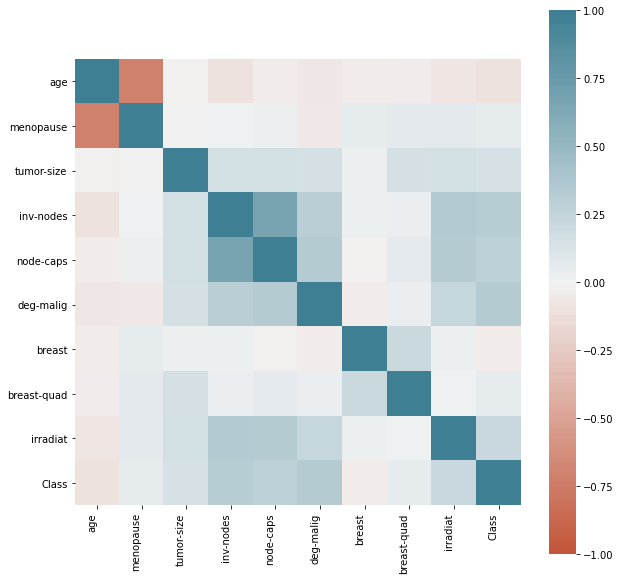

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
fig= plt.subplots(figsize = [10,10])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

As no feature is highly correlated with the Class(Target Varaible) .....Hence will keep as  the features in the model

In [45]:
y=data.pop("Class")
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [46]:
X=data
X.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,2,2,2,0,1,2,1,2,0
1,3,0,2,0,0,0,1,0,0
2,3,0,6,0,0,1,0,1,0
3,2,2,6,0,1,2,1,1,1
4,2,2,5,4,1,1,0,4,0


In [47]:
from sklearn.model_selection import train_test_split
seed=16
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (221, 9)
X_test Shape:  (56, 9)
y_train Shape:  (221,)
y_test Shape:  (56,)


In [48]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten

filepath = "Remedial_Assign3_Model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30, min_delta=0.01, baseline=0.99)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(128,activation="relu",input_shape=(9,)))
model1.add(Dropout(0.5))
model1.add(layers.Dense(64,activation="tanh"))
model1.add(Dropout(0.65))
model1.add(layers.Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1280      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [49]:
model1.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history=model1.fit(X_train, y_train, epochs=200,validation_split=0.2,callbacks=callbacks_list)

Epoch 1/200
1/6 [====>.........................] - ETA: 0s - loss: 0.9400 - accuracy: 0.5000
Epoch 00001: val_accuracy improved from -inf to 0.68889, saving model to Remedial_Assign3_Model.hdf5
6/6 [==============================] - 0s 32ms/step - loss: 0.7657 - accuracy: 0.5966 - val_loss: 0.6761 - val_accuracy: 0.6889
Epoch 2/200
1/6 [====>.........................] - ETA: 0s - loss: 0.9467 - accuracy: 0.5312
Epoch 00002: val_accuracy did not improve from 0.68889
6/6 [==============================] - 0s 5ms/step - loss: 0.7635 - accuracy: 0.5966 - val_loss: 0.6886 - val_accuracy: 0.6889
Epoch 3/200
1/6 [====>.........................] - ETA: 0s - loss: 0.7435 - accuracy: 0.7188
Epoch 00003: val_accuracy did not improve from 0.68889
6/6 [==============================] - 0s 4ms/step - loss: 0.7896 - accuracy: 0.6705 - val_loss: 0.6986 - val_accuracy: 0.6889
Epoch 4/200
1/6 [====>.........................] - ETA: 0s - loss: 0.8085 - accuracy: 0.6250
Epoch 00004: val_accuracy improved 

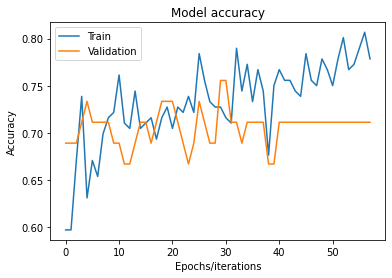

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

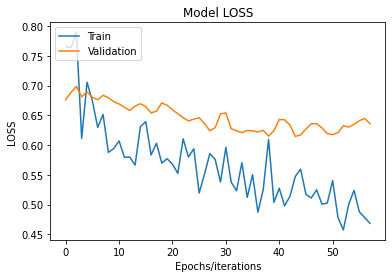

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("LOSS")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

In [53]:
from keras.models import load_model
saved_model = load_model('Remedial_Assign3_Model.hdf5')
test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss))

Test Accuracy: 0.75000000
Test Loss: 0.551


Test Accuracy:  0.75

Test Loss: 0.551

Accuracy coming around ~ 80% in Training

Validation & Testing Dataset ~75%

Plot of accuracy of Train & Validation done above

Callback is used here to save the improved model.

Hyper-Parameter used here are:

1)Made 1st Layer of Relu Activation and the input dimension = 9 as 9 variables in dataset.

2)Added next 1 relu  layers and output layers as nodes=1 as binary class in dataset

3)Optimizer used : Adam for faster convergence.

4)Metrics: Accuracy to find accuray atlast.

5)loss='binary_crossentropy' as it has 2 different classes

6)Callbackused are: earlystopping, modelcheckpoint.

7)Epoch=200



---

---



